In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow.keras.layers import Normalization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Convert categorical columns into numbers using one-hot encoding
dataset = pd.get_dummies(dataset, columns=["sex", "smoker", "region"], drop_first=False)


# Split dataset into train (80%) and test (20%)
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# Separate labels (expenses)
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [5]:
# Create normalization layer
normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(dataset.drop("expenses", axis=1)))

In [6]:
#Model build
def build_model():
    model = Sequential([
        normalizer,
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

model = build_model()

In [7]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 578 to 859
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1070 non-null   int64  
 1   bmi               1070 non-null   float64
 2   children          1070 non-null   int64  
 3   sex_female        1070 non-null   bool   
 4   sex_male          1070 non-null   bool   
 5   smoker_no         1070 non-null   bool   
 6   smoker_yes        1070 non-null   bool   
 7   region_northeast  1070 non-null   bool   
 8   region_northwest  1070 non-null   bool   
 9   region_southeast  1070 non-null   bool   
 10  region_southwest  1070 non-null   bool   
dtypes: bool(8), float64(1), int64(2)
memory usage: 41.8 KB


In [8]:
#Training the model
history = model.fit(
    train_dataset, train_labels,
    epochs=150,
    validation_split=0.2,
    verbose=1
)

Epoch 1/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 301812896.0000 - mae: 12709.7148 - mse: 301812896.0000 - val_loss: 362984576.0000 - val_mae: 14417.8584 - val_mse: 362984576.0000
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 300797920.0000 - mae: 12675.8740 - mse: 300797920.0000 - val_loss: 360150912.0000 - val_mae: 14336.8760 - val_mse: 360150912.0000
Epoch 3/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 295108416.0000 - mae: 12504.6377 - mse: 295108416.0000 - val_loss: 347675168.0000 - val_mae: 14001.1592 - val_mse: 347675168.0000
Epoch 4/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 275784928.0000 - mae: 11944.5674 - mse: 275784928.0000 - val_loss: 311745056.0000 - val_mae: 13052.8701 - val_mse: 311745056.0000
Epoch 5/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 231038800.0000 - mae: 10622.3984 - mse: 231038800.0000 - val_loss: 238205648.0000 - val_mae: 11026.6172 - val_mse: 238205648.0000
Epoch 6/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

9/9 - 0s - 2ms/step - loss: 33992012.0000 - mae: 3286.1021 - mse: 33992012.0000
Testing set Mean Abs Error: 3286.10 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


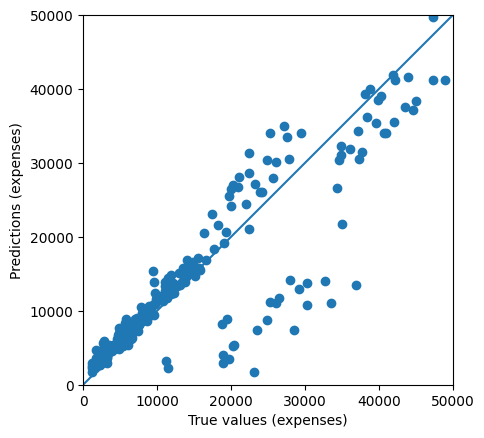

In [9]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)